In [1]:
%load_ext nb_black

ModuleNotFoundError: No module named 'nb_black'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from protein_conformal.util import *

c:\Users\zhiwe\miniconda3\envs\cpr\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name '_moduleTNC' from partially initialized module 'scipy.optimize' (most likely due to a circular import) (c:\Users\zhiwe\miniconda3\envs\cpr\Lib\site-packages\scipy\optimize\__init__.py)

In [4]:
# query_embeddings = np.load('/data/ron/protein-conformal/data/gene_unknown/all_aa_seqs.npy')
query_embeddings = np.load('/data/ron/protein-conformal/data/gene_unknown/unknown_aa_seqs.npy')

<IPython.core.display.Javascript object>

In [5]:
query_embeddings.shape

(149, 512)

<IPython.core.display.Javascript object>

In [6]:
# query_fastas, query_metadata = read_fasta('/data/ron/protein-conformal/data/gene_unknown/all_aa_seqs.fasta')
query_fastas, query_metadata = read_fasta('/data/ron/protein-conformal/data/gene_unknown/unknown_aa_seqs.fasta')

<IPython.core.display.Javascript object>

In [7]:
embeddings = np.load('/data/ron/protein-vec/src_run/protein_vec_embeddings/lookup_embeddings.npy')
lookup_proteins_meta = pd.read_csv('/data/ron/protein-vec/src_run/protein_vec_embeddings/lookup_embeddings_meta_data.tsv', sep="\t")

<IPython.core.display.Javascript object>

In [8]:
column = 'Pfam'
col_lookup = lookup_proteins_meta[~lookup_proteins_meta[column].isnull()]
col_lookup_embeddings = embeddings[col_lookup.index]
col_meta_data = col_lookup[column].values

# load database
lookup_database = load_database(col_lookup_embeddings)

<IPython.core.display.Javascript object>

In [9]:
# Query for the 1st nearest neighbor
k = 1
D, I = query(lookup_database, query_embeddings, k)

<IPython.core.display.Javascript object>

In [10]:
D_max = np.max(D, axis=1)

<IPython.core.display.Javascript object>

In [19]:
# Get a probability for each hit based on the distance using Venn-Abers / isotonic regression
data = np.load('/data/ron/protein-conformal/data/pfam_new_proteins.npy', allow_pickle=True)



<IPython.core.display.Javascript object>

In [20]:
n_calib = 100
np.random.shuffle(data)
cal_data = data[:n_calib]
X_cal, y_cal = get_sims_labels(cal_data, partial=False)
X_cal = X_cal.flatten()
y_cal = y_cal.flatten()


<IPython.core.display.Javascript object>

In [23]:
p_s = []
for d in D:
    p_0, p_1 = simplifed_venn_abers_prediction(X_cal, y_cal, d)
    p_s.append([p_0, p_1])
p_s = np.array(p_s)

<IPython.core.display.Javascript object>

In [24]:
abs_p = [np.abs(p[0] - p[1]) for p in p_s]

<IPython.core.display.Javascript object>

In [25]:
max(abs_p)

0.01343286

<IPython.core.display.Javascript object>

In [14]:
fdr = np.load('/data/ron/protein-conformal/data/pfam_fdr_2024-06-25.npy', allow_pickle=True)

<IPython.core.display.Javascript object>

In [15]:
fdr = fdr.item()

<IPython.core.display.Javascript object>

In [16]:
fdr.keys()

dict_keys(['risks', 'tprs', 'lhats', 'fdr_cals'])

<IPython.core.display.Javascript object>

In [17]:
np.mean(fdr['lhats'])

0.999980225003127

<IPython.core.display.Javascript object>

In [26]:
# l_hat = 0.999980225003127 # mean result
l_hat = np.mean(fdr['lhats'])

<IPython.core.display.Javascript object>

In [27]:
(D_max > l_hat).sum()

59

<IPython.core.display.Javascript object>

In [28]:
filtered_I = I[D_max > l_hat]

<IPython.core.display.Javascript object>

(array([ 3.,  3., 20., 18., 14.,  4.,  4., 22.,  8., 53.]),
 array([0.04385952, 0.13932326, 0.23478702, 0.33025077, 0.42571452,
        0.52117825, 0.616642  , 0.71210575, 0.8075695 , 0.90303326,
        0.998497  ], dtype=float32),
 <BarContainer object of 10 artists>)

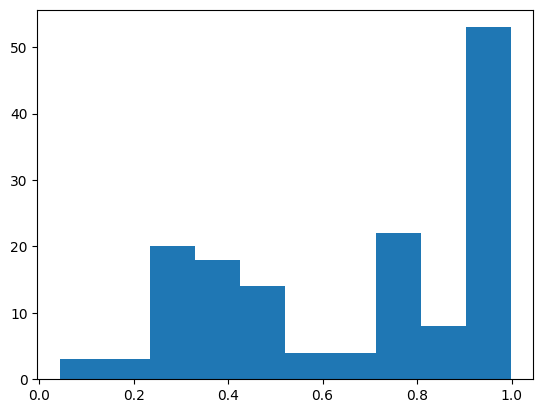

<IPython.core.display.Javascript object>

In [38]:
plt.hist(np.mean(p_s, axis=1))

In [29]:
first_entries = filtered_I[:, 0]

<IPython.core.display.Javascript object>

In [43]:
# Pull all the Pfam entries for the first entries, organize into a dataframe that also has the D and p_s values
first_entries_meta = col_meta_data
first_entries_D = D_max
first_entries_p_s = np.mean(p_s, axis=1)


<IPython.core.display.Javascript object>

In [44]:
first_entries_df = pd.DataFrame({'Pfam': first_entries_meta, 'D': first_entries_D, 'p_s': first_entries_p_s})

ValueError: All arrays must be of the same length

<IPython.core.display.Javascript object>

In [45]:
first_entries_df

,Pfam,D,p_s
0,PF10035;PF02588;,0.999988,0.986559
1,PF03932;,0.999992,0.987225
2,PF01261;,1.000000,0.996994
3,PF01367;PF02739;,0.999988,0.984726
4,PF01207;,0.999995,0.987225
5,PF01431;PF05649;,0.999984,0.941558
6,PF01321;PF00557;,0.999990,0.987183
7,PF05175;,0.999989,0.986619
8,PF08282;,0.999998,0.987225
9,PF01966;,0.999990,0.986619


<IPython.core.display.Javascript object>

In [30]:
df_hits = col_lookup.iloc[first_entries].drop(columns='Unnamed: 0').reset_index(drop=True)
df_hits['query sequence'] = np.array(query_fastas)[D_max > l_hat]
df_hits['query_name'] = np.array(query_metadata)[D_max > l_hat]
# Define the columns you want to appear first
first_columns = ['query_name', 'query sequence']

# Get the remaining columns excluding the ones you want first
remaining_columns = [col for col in df_hits.columns if col not in first_columns]

# Combine the lists to get the new column order
new_column_order = first_columns + remaining_columns

# Reindex the DataFrame with the new column order
df_hits = df_hits[new_column_order]

<IPython.core.display.Javascript object>

In [31]:
# from Bio import pairwise2
# from Bio.pairwise2 import format_alignment
from Bio.Align import PairwiseAligner


<IPython.core.display.Javascript object>

In [32]:
# Define the sequence identity function using Bio.Align.PairwiseAligner
def seq_identity(seq1, seq2):
    """
    Calculate the sequence identity between two sequences using pairwise alignment.
    
    Parameters:
    seq1 (str): First sequence
    seq2 (str): Second sequence
    
    Returns:
    float: Sequence identity percentage
    """
    aligner = PairwiseAligner()
    alignments = aligner.align(seq1, seq2)
    best_alignment = alignments[0]
    seq1_aligned, seq2_aligned = best_alignment.aligned
    
    # Calculate identity
    matches = sum(a == b for a, b in zip(seq1, seq2) if a == b)
    length = max(len(seq1), len(seq2))
    return matches / length * 100

<IPython.core.display.Javascript object>

In [33]:
df_hits['seq_identity'] = df_hits.apply(lambda x: seq_identity(x['query sequence'], x['Sequence']), axis=1)

<IPython.core.display.Javascript object>

<AxesSubplot:>

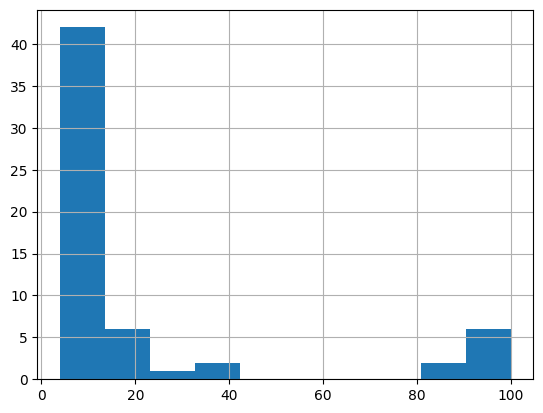

<IPython.core.display.Javascript object>

In [34]:
df_hits['seq_identity'].hist()

In [35]:
df_hits.head()

,query_name,query sequence,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function),Gene Ontology (GO),EC number,Sequence,Date of creation,Gene3D,Pfam,seq_identity
0,>MMSYN1_0411 1=Unknown,MQIPIIKPKKAPPLTIEEINEIKQHSSYEKSYLKTFNKYKKKVEHR...,P75134,reviewed,Y657_MYCPN,Uncharacterized protein MG443 homolog,MPN_657 K05_orf401 MP185,Mycoplasma pneumoniae (strain ATCC 29342 / M12...,401,NaN,plasma membrane [GO:0005886],NaN,plasma membrane [GO:0005886],NaN,MDWLKRWFTRKDQDKTETTSASKRAKITSSLLMFSALYEAKKPLKY...,1997-11-01,3.30.70.120;,PF10035;PF02588;,6.547619
1,>MMSYN1_0433 1=Unknown,MFLEVIAKDLSDIRVINNSKADRIEFCKNLEVGGLTPSLDEIILAN...,B0URL9,reviewed,CUTC_HISS2,PF03932 family protein CutC,cutC HSM_0457,Histophilus somni (strain 2336) (Haemophilus s...,243,NaN,cytoplasm [GO:0005737],NaN,cytoplasm [GO:0005737],NaN,MDIEICIDNIESALIAQNSGADRLEVCGCLALGGVTPPYSLIKTVL...,2008-05-20,3.20.20.380;,PF03932;,15.637860
2,>MMSYN1_0109 2=Generic,MNKVLLGCHVSMNKQNNYLVGSVNEAISYKANTFMIFTGPPQSTLR...,Q2ST57,reviewed,END4_MYCCT,Probable endonuclease 4 (EC 3.1.21.2) (Endodeo...,nfo MCAP_0060,Mycoplasma capricolum subsp. capricolum (strai...,289,DNA repair [GO:0006281],NaN,deoxyribonuclease IV (phage-T4-induced) activi...,deoxyribonuclease IV (phage-T4-induced) activi...,3.1.21.2,MDKVLLGCHVSMNKQNNYLVGSVNEAISYKANTFMIFTGPPQSTLR...,2008-01-15,3.20.20.150;,PF01261;,96.193772
3,>MMSYN1_0097 2=Generic,MITNETKPILLIDGYHLLHKGYYGTLKRTIVSKNKDGIVINAIYSF...,Q9KAV6,reviewed,EX53_HALH5,5'-3' exonuclease (EC 3.1.11.-),BH2180,Halalkalibacterium halodurans (strain ATCC BAA...,303,"DNA replication, Okazaki fragment processing [...",NaN,5'-flap endonuclease activity [GO:0017108]; DN...,5'-flap endonuclease activity [GO:0017108]; DN...,3.1.11.-,MHSPVLLLIDGFNLLSRGYFATSYGKDEAQLPRNEAGYYINALRVF...,2001-11-16,1.10.150.20;3.40.50.1010;,PF01367;PF02739;,15.181518
4,>MMSYN1_0063 2=Generic,MKIRDIQIDGKVVQGPMAGVSNEAFRIISKQHGASLVYAEMVSVAG...,Q1RH84,reviewed,DUS_RICBR,Probable tRNA-dihydrouridine synthase (EC 1.3....,dus RBE_1199,Rickettsia bellii (strain RML369-C),326,NaN,NaN,flavin adenine dinucleotide binding [GO:005066...,flavin adenine dinucleotide binding [GO:005066...,1.3.1.-,MIKIGNIELSSNIILAPMSGVTDLEFRRLVKRFGAGLVVSEMIASR...,2007-03-20,3.20.20.70;,PF01207;,28.220859


<IPython.core.display.Javascript object>

In [ ]:
df_hits.to_csv('/data/ron/protein-conformal/data/gene_unknown/unknown_aa_seqs_pfam_hits.csv', index=False)

<IPython.core.display.Javascript object>

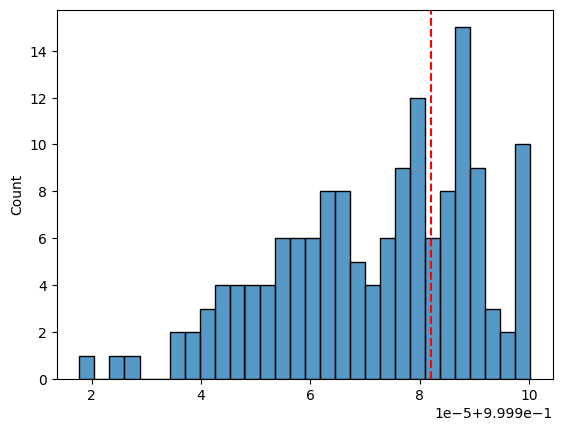

<IPython.core.display.Javascript object>

In [17]:
# sns.distplot(D_max)
# sns.displot(D_max)
sns.histplot(D_max, bins=30)
plt.axvline(l_hat, color='r', linestyle='--')


In [75]:
# Determine the counts
total_count = len(D_max)
hits_count = np.sum(D_max >= l_hat)
no_hits_count = np.sum(D_max < l_hat)

<IPython.core.display.Javascript object>

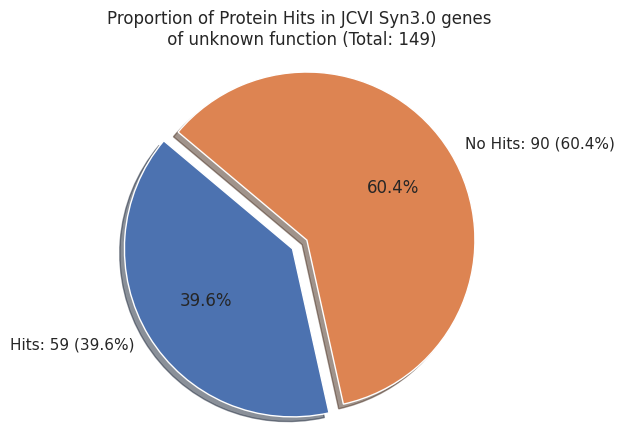

<IPython.core.display.Javascript object>

In [76]:
# Set the style to a Seaborn style
sns.set_theme(style="whitegrid")
# Create the pie chart
labels = [
    f'Hits: {hits_count} ({hits_count / total_count * 100:.1f}%)',
    f'No Hits: {no_hits_count} ({no_hits_count / total_count * 100:.1f}%)'
]
sizes = [hits_count, no_hits_count]
colors = sns.color_palette()[0:2]  # Use Seaborn's color palette
explode = (0.1, 0)  # only "explode" the 1st slice (Hits)

plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Proportion of Protein Hits in JCVI Syn3.0 genes\n of unknown function (Total: {total_count})')
plt.savefig('/data/ron/protein-conformal/figs/pfam_new/protein_hits_pie.pdf', bbox_inches='tight')